In [ ]:
!pip install uproot awkward
!pip install vector
!pip install matplotlib
!pip install numpy
!pip install scipy

In [ ]:
import uproot
import vector
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Zboson.root to Zboson.root


In [ ]:
file=uproot.open("Zboson.root")
print(file.keys())

['tag;1', 'Events;1', 'LuminosityBlocks;1', 'Runs;1', 'MetaData;1', 'ParameterSets;1']


In [ ]:

tree = file["Events;1"]
print(tree.keys())


['run', 'luminosityBlock', 'event', 'HTXS_Higgs_pt', 'HTXS_Higgs_y', 'HTXS_stage1_1_cat_pTjet25GeV', 'HTXS_stage1_1_cat_pTjet30GeV', 'HTXS_stage1_1_fine_cat_pTjet25GeV', 'HTXS_stage1_1_fine_cat_pTjet30GeV', 'HTXS_stage_0', 'HTXS_stage_1_pTjet25', 'HTXS_stage_1_pTjet30', 'HTXS_njets25', 'HTXS_njets30', 'btagWeight_CSVV2', 'btagWeight_DeepCSVB', 'CaloMET_phi', 'CaloMET_pt', 'CaloMET_sumEt', 'ChsMET_phi', 'ChsMET_pt', 'ChsMET_sumEt', 'nCorrT1METJet', 'CorrT1METJet_area', 'CorrT1METJet_eta', 'CorrT1METJet_muonSubtrFactor', 'CorrT1METJet_phi', 'CorrT1METJet_rawPt', 'nElectron', 'Electron_deltaEtaSC', 'Electron_dr03EcalRecHitSumEt', 'Electron_dr03HcalDepth1TowerSumEt', 'Electron_dr03TkSumPt', 'Electron_dr03TkSumPtHEEP', 'Electron_dxy', 'Electron_dxyErr', 'Electron_dz', 'Electron_dzErr', 'Electron_eInvMinusPInv', 'Electron_energyErr', 'Electron_eta', 'Electron_hoe', 'Electron_ip3d', 'Electron_jetPtRelv2', 'Electron_jetRelIso', 'Electron_mass', 'Electron_miniPFRelIso_all', 'Electron_miniPFRelI

In [ ]:
events = file["Events;1"]

branches = tree.keys()
z_boson_branches = [b for b in branches if "Electron" in b]
print(z_boson_branches)

['nElectron', 'Electron_deltaEtaSC', 'Electron_dr03EcalRecHitSumEt', 'Electron_dr03HcalDepth1TowerSumEt', 'Electron_dr03TkSumPt', 'Electron_dr03TkSumPtHEEP', 'Electron_dxy', 'Electron_dxyErr', 'Electron_dz', 'Electron_dzErr', 'Electron_eInvMinusPInv', 'Electron_energyErr', 'Electron_eta', 'Electron_hoe', 'Electron_ip3d', 'Electron_jetPtRelv2', 'Electron_jetRelIso', 'Electron_mass', 'Electron_miniPFRelIso_all', 'Electron_miniPFRelIso_chg', 'Electron_mvaFall17V1Iso', 'Electron_mvaFall17V1noIso', 'Electron_mvaFall17V2Iso', 'Electron_mvaFall17V2noIso', 'Electron_pfRelIso03_all', 'Electron_pfRelIso03_chg', 'Electron_phi', 'Electron_pt', 'Electron_r9', 'Electron_sieie', 'Electron_sip3d', 'Electron_mvaTTH', 'Electron_charge', 'Electron_cutBased', 'Electron_cutBased_Fall17_V1', 'Electron_jetIdx', 'Electron_pdgId', 'Electron_photonIdx', 'Electron_tightCharge', 'Electron_vidNestedWPBitmap', 'Electron_convVeto', 'Electron_cutBased_HEEP', 'Electron_isPFcand', 'Electron_lostHits', 'Electron_mvaFall

In [ ]:
events = file["Events;1"]

branches = tree.keys()
electrons_branches = [b for b in branches if "Muon" in b]
print(electrons_branches)

['Jet_nMuons', 'nMuon', 'Muon_dxy', 'Muon_dxyErr', 'Muon_dz', 'Muon_dzErr', 'Muon_eta', 'Muon_ip3d', 'Muon_jetPtRelv2', 'Muon_jetRelIso', 'Muon_mass', 'Muon_miniPFRelIso_all', 'Muon_miniPFRelIso_chg', 'Muon_pfRelIso03_all', 'Muon_pfRelIso03_chg', 'Muon_pfRelIso04_all', 'Muon_phi', 'Muon_pt', 'Muon_ptErr', 'Muon_segmentComp', 'Muon_sip3d', 'Muon_softMva', 'Muon_tkRelIso', 'Muon_tunepRelPt', 'Muon_mvaLowPt', 'Muon_mvaTTH', 'Muon_charge', 'Muon_jetIdx', 'Muon_nStations', 'Muon_nTrackerLayers', 'Muon_pdgId', 'Muon_tightCharge', 'Muon_highPtId', 'Muon_inTimeMuon', 'Muon_isGlobal', 'Muon_isPFcand', 'Muon_isTracker', 'Muon_looseId', 'Muon_mediumId', 'Muon_mediumPromptId', 'Muon_miniIsoId', 'Muon_multiIsoId', 'Muon_mvaId', 'Muon_pfIsoId', 'Muon_puppiIsoId', 'Muon_softId', 'Muon_softMvaId', 'Muon_tightId', 'Muon_tkIsoId', 'Muon_triggerIdLoose', 'Muon_genPartIdx', 'Muon_genPartFlav', 'Muon_cleanmask', 'HLT_Trimuon5_3p5_2_Upsilon_Muon', 'HLT_TrimuonOpen_5_3p5_2_Upsilon_Muon', 'HLT_Dimuon0_Jpsi3p5

In [ ]:
events = file["Events;1"]

branches = tree.keys()

# Only show muon-related branches
muon_branches = [b for b in branches if "Muon" in b]
print(muon_branches)



['Jet_nMuons', 'nMuon', 'Muon_dxy', 'Muon_dxyErr', 'Muon_dz', 'Muon_dzErr', 'Muon_eta', 'Muon_ip3d', 'Muon_jetPtRelv2', 'Muon_jetRelIso', 'Muon_mass', 'Muon_miniPFRelIso_all', 'Muon_miniPFRelIso_chg', 'Muon_pfRelIso03_all', 'Muon_pfRelIso03_chg', 'Muon_pfRelIso04_all', 'Muon_phi', 'Muon_pt', 'Muon_ptErr', 'Muon_segmentComp', 'Muon_sip3d', 'Muon_softMva', 'Muon_tkRelIso', 'Muon_tunepRelPt', 'Muon_mvaLowPt', 'Muon_mvaTTH', 'Muon_charge', 'Muon_jetIdx', 'Muon_nStations', 'Muon_nTrackerLayers', 'Muon_pdgId', 'Muon_tightCharge', 'Muon_highPtId', 'Muon_inTimeMuon', 'Muon_isGlobal', 'Muon_isPFcand', 'Muon_isTracker', 'Muon_looseId', 'Muon_mediumId', 'Muon_mediumPromptId', 'Muon_miniIsoId', 'Muon_multiIsoId', 'Muon_mvaId', 'Muon_pfIsoId', 'Muon_puppiIsoId', 'Muon_softId', 'Muon_softMvaId', 'Muon_tightId', 'Muon_tkIsoId', 'Muon_triggerIdLoose', 'Muon_genPartIdx', 'Muon_genPartFlav', 'Muon_cleanmask', 'HLT_Trimuon5_3p5_2_Upsilon_Muon', 'HLT_TrimuonOpen_5_3p5_2_Upsilon_Muon', 'HLT_Dimuon0_Jpsi3p5

In [ ]:
mu_pt  = events["Muon_pt"].array()
mu_eta = events["Muon_eta"].array()
mu_phi = events["Muon_phi"].array()
mu_m   = events["Muon_mass"].array()

In [ ]:
# Create Lorentz vectors for all muons
muons = vector.awkward.zip({
    "pt": mu_pt,
    "eta": mu_eta,
    "phi": mu_phi,
    "mass": mu_m
})


In [ ]:
# Create a mask for events with exactly two muons
mask = ak.num(mu_pt) == 2
# Apply the mask to all muon arrays
di_muon_pt = mu_pt[mask]
di_muon_eta = mu_eta[mask]
di_muon_phi = mu_phi[mask]
muon_k= muons[mask]

In [ ]:
# Select the first and second muons in each event
muon1_pt = di_muon_pt[:, 0]
muon2_pt = di_muon_pt[:, 1]

muon1_eta = di_muon_eta[:, 0]
muon2_eta = di_muon_eta[:, 1]

muon1_phi = di_muon_phi[:, 0]
muon2_phi = di_muon_phi[:, 1]

# Calculate invariant mass using the formula
dimuon_mass = np.sqrt(
    2 * muon1_pt * muon2_pt * (
        np.cosh(muon1_eta - muon2_eta) - np.cos(muon1_phi - muon2_phi)
    )
)


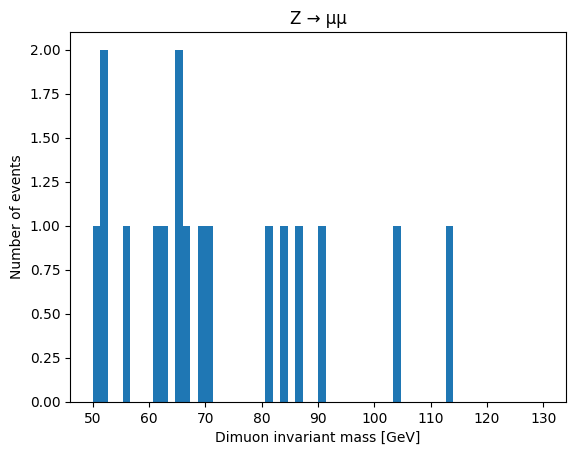

In [ ]:

# 6. Optional: plot the invariant mass distribution
plt.hist(ak.to_numpy(dimuon_mass), bins=60, range=(50,130))
plt.xlabel("Dimuon invariant mass [GeV]")
plt.ylabel("Number of events")
plt.title("Z → μμ")
plt.show()


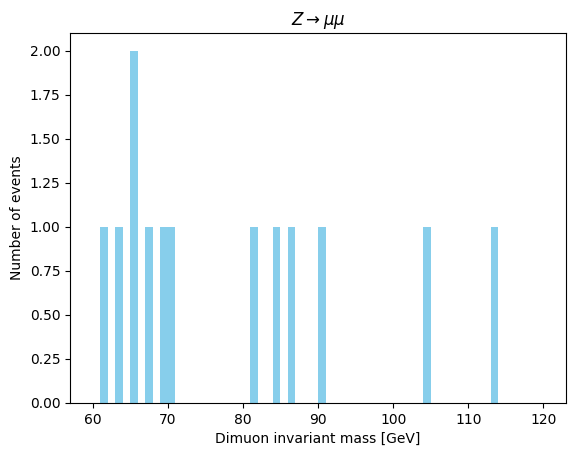

In [ ]:
bin_width = 1.0  # GeV
mass_min = 60    # GeV
mass_max = 120   # GeV
bins = int((mass_max - mass_min) / bin_width)

# Plot histogram
plt.hist(dimuon_mass, bins=bins, range=(mass_min, mass_max), histtype='stepfilled', color='skyblue')
plt.xlabel("Dimuon invariant mass [GeV]")
plt.ylabel("Number of events")
plt.title(r"$Z \rightarrow \mu\mu$")
plt.show()

In [ ]:
print("Total events:", len(muons))
print("Events with = muons:", len(muon_k))


Total events: 54000
Events with = muons: 1853


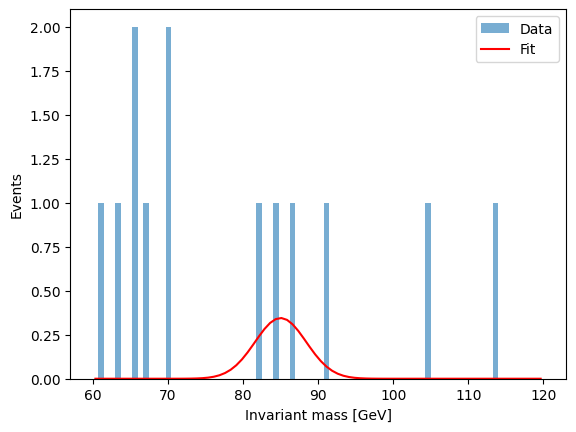

Fit results:
Mean (Z mass)  = 85.02 GeV
Sigma (width)  = 3.40 GeV


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# define gaussian
def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2*sigma**2))

# data (convert awkward → numpy)
masses = ak.to_numpy(dimuon_mass)

# histogram
counts, bins = np.histogram(masses, bins=80, range=(60,120))
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# fit
popt, pcov = curve_fit(gaussian, bin_centers, counts, p0=[100, 91, 2])

# plot
plt.hist(masses, bins=80, range=(60,120), alpha=0.6, label="Data")
plt.plot(bin_centers, gaussian(bin_centers, *popt), 'r-', label="Fit")
plt.xlabel("Invariant mass [GeV]")
plt.ylabel("Events")
plt.legend()
plt.show()

print("Fit results:")
print(f"Mean (Z mass)  = {popt[1]:.2f} GeV")
print(f"Sigma (width)  = {popt[2]:.2f} GeV")


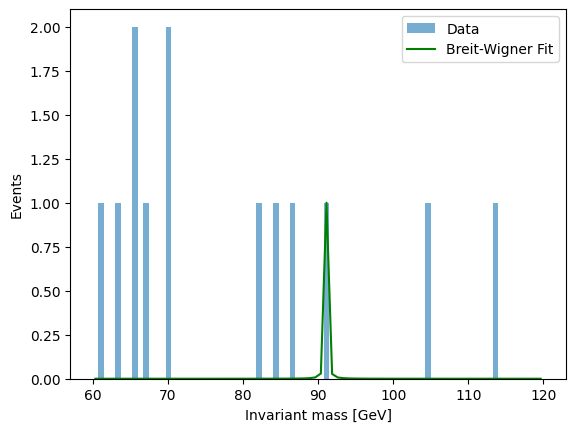

Breit-Wigner fit results:
Mass   = 91.11 GeV
Width  = 0.25 GeV


In [ ]:
def model(x, A, M, Gamma, B, C):
    return breit_wigner(x, A, M, Gamma) + B + C*x



def breit_wigner(x, A, M, Gamma):
    return A * (Gamma**2) / ((x-M)**2 + (Gamma**2)/4)

popt, pcov = curve_fit(breit_wigner, bin_centers, counts, p0=[1000, 91, 2.5])

plt.hist(masses, bins=80, range=(60,120), alpha=0.6, label="Data")
plt.plot(bin_centers, breit_wigner(bin_centers, *popt), 'g-', label="Breit-Wigner Fit")
plt.xlabel("Invariant mass [GeV]")
plt.ylabel("Events")
plt.legend()
plt.show()

print("Breit-Wigner fit results:")
print(f"Mass   = {popt[1]:.2f} GeV")
print(f"Width  = {popt[2]:.2f} GeV")


In [ ]:
def model(x, A, M, Gamma, B, C):
    return breit_wigner(x, A, M, Gamma) + B + C*x


In [ ]:
import numpy as np
m = ak.to_numpy(dimuon_mass)
print("count events:", len(m))
print("min, max:", np.nanmin(m), np.nanmax(m))
print("nan count:", np.isnan(m).sum())


count events: 1853
min, max: 0.041010484 113.25679
nan count: 0


In [ ]:
counts, bins = np.histogram(m, bins=50, range=(60,120))
print("sum counts:", counts.sum())  # should equal number of masses (or number of entries after masking)


sum counts: 13


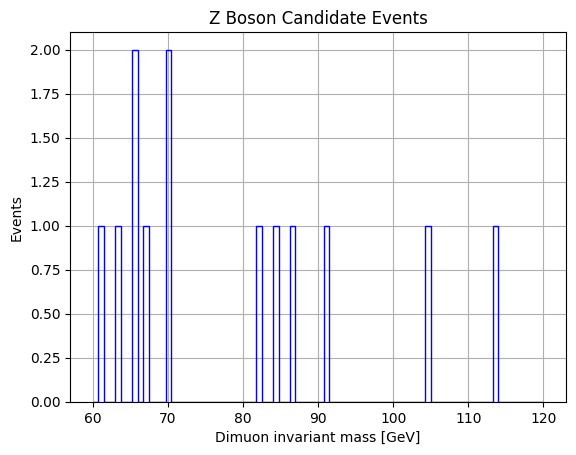

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Convert awkward array to numpy
mass = ak.to_numpy(dimuon_mass)

# Make histogram
plt.hist(mass, bins=80, range=(60,120), histtype='step', color='blue')
plt.xlabel("Dimuon invariant mass [GeV]")
plt.ylabel("Events")
plt.title("Z Boson Candidate Events")
plt.grid(True)
plt.show()


Fitted Z boson mass = 85.02 GeV
Width (sigma) = 3.40 GeV


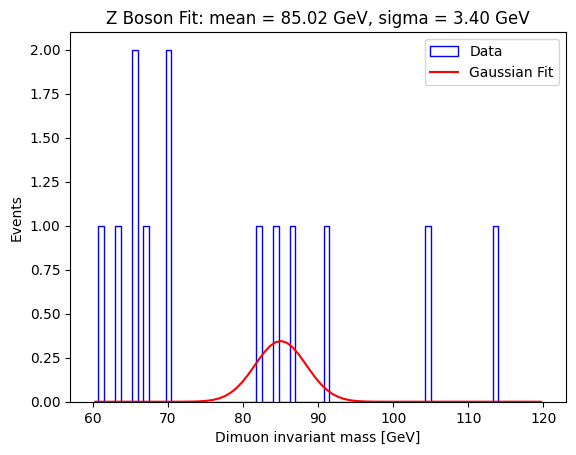

In [ ]:
from scipy.optimize import curve_fit

# Define Gaussian function
def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Create histogram data
counts, bin_edges = np.histogram(mass, bins=80, range=(60,120))
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Initial guesses: amplitude, mean, sigma
p0 = [max(counts), 91, 2]

# Fit
params, cov = curve_fit(gaussian, bin_centers, counts, p0=p0)
A, mu, sigma = params

print(f"Fitted Z boson mass = {mu:.2f} GeV")
print(f"Width (sigma) = {sigma:.2f} GeV")

# Plot fit
plt.hist(mass, bins=80, range=(60,120), histtype='step', color='blue', label="Data")
plt.plot(bin_centers, gaussian(bin_centers, *params), 'r-', label='Gaussian Fit')
plt.xlabel("Dimuon invariant mass [GeV]")
plt.ylabel("Events")
plt.legend()
plt.title(f"Z Boson Fit: mean = {mu:.2f} GeV, sigma = {sigma:.2f} GeV")
plt.show()


In [ ]:
print(ak.num(muons))


[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ..., 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1]
